In [1]:
import numpy as np
import pandas as pd
import os

np.random.seed(0)
#display(np.random.randint(50,100,1000))

data = pd.DataFrame({'Điểm thi':np.random.randint(50,100,1000)})
#display(data)

In [2]:
data['Giới tính'] = np.where(np.random.rand(1000) > 0.5, 'Nam', 'Nữ')
#display(data)
# Lấy mẫu phân tầng (25 sinh viên mỗi giới tính)
sample_stratified = data.groupby('Giới tính', group_keys=False).apply(lambda x: x.sample(25),include_groups=False)
#display(sample_stratified)
#print("Mẫu phân tầng với 25 sinh viên mỗi giới tính:\n", sample_stratified.head())

In [3]:
# Construct the path to the data file in an OS-independent way
data_dir='data'
filename='Salary_with_genders.csv'
# Get the current working directory of the script
current_dir = os.getcwd()

# Construct the path to the data file by going up one level ('..')
# and then into the 'data' folder.
file_path = os.path.join(current_dir, '..', '..', data_dir, filename)

# Normalize the path to resolve '..' and get the absolute path
file_path = os.path.abspath(file_path)

df = pd.read_csv(file_path)

# Thêm cột group_age dựa trên độ tuổi
bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '40-50', '>=50']
df['group_age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# print(df['group_age'])
# display(df)
display(df.groupby('group_age')['group_age'].count())
# Tính tỉ lệ từng group_age so với tổng số mẫu
age_ratio = df['group_age'].value_counts(normalize=True).sort_index()
print("Tỉ lệ từng nhóm tuổi so với tổng số mẫu:")
print(age_ratio)
#======================================================================
# Phương pháp 1: Sử dụng groupby().mean() (Phổ biến nhất)
#======================================================================
# chuyển cột Salary (vd. "$166,400.00") sang float và lưu vào cột float_Salary
df['str_Salary'] = df['Salary']
display(df.head())
df['Salary'] = df['Salary'].str.replace(r'[\$,]', '', regex=True).astype(float)
display(df.head())
print("--- Phương pháp 1: groupby().mean() ---")
avg_salary_groupby = df.groupby('Gender')['Salary'].mean()

# Định dạng kết quả cho dễ đọc (làm tròn 2 chữ số thập phân và có dấu phẩy)
formatted_avg_salary = avg_salary_groupby.map('{:,.2f}'.format)

print("Lương trung bình của 2 giới:")
print(formatted_avg_salary)
print("\n" + "="*50 + "\n")

C:\Users\phuongtht\AppData\Local\Temp\ipykernel_3220\1972956895.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('group_age')['group_age'].count())


group_age
<30      28
30-40    86
40-50    41
>=50     19
Name: group_age, dtype: int64

Tỉ lệ từng nhóm tuổi so với tổng số mẫu:
group_age
<30      0.160920
30-40    0.494253
40-50    0.235632
>=50     0.109195
Name: proportion, dtype: float64


,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,group_age,str_Salary
0,Bold,Caroline,63,Female,United States,White,7/2/2012,Executive Office,President & CEO,"$166,400.00",>=50,"$166,400.00"
1,Zamora,Jennifer,38,Female,United States,White,4/10/2010,IT/IS,CIO,"$135,200.00",30-40,"$135,200.00"
2,Houlihan,Debra,51,Female,United States,White,5/5/2014,Sales,Director of Sales,"$124,800.00",>=50,"$124,800.00"
3,Bramante,Elisa,34,Female,United States,Black or African American,1/5/2009,Production,Director of Operations,"$124,800.00",30-40,"$124,800.00"
4,Del Bosque,Keyla,38,Female,United States,Black or African American,1/9/2012,Software Engineering,Software Engineer,"$118,809.60",30-40,"$118,809.60"


,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,group_age,str_Salary
0,Bold,Caroline,63,Female,United States,White,7/2/2012,Executive Office,President & CEO,166400.0,>=50,"$166,400.00"
1,Zamora,Jennifer,38,Female,United States,White,4/10/2010,IT/IS,CIO,135200.0,30-40,"$135,200.00"
2,Houlihan,Debra,51,Female,United States,White,5/5/2014,Sales,Director of Sales,124800.0,>=50,"$124,800.00"
3,Bramante,Elisa,34,Female,United States,Black or African American,1/5/2009,Production,Director of Operations,124800.0,30-40,"$124,800.00"
4,Del Bosque,Keyla,38,Female,United States,Black or African American,1/9/2012,Software Engineering,Software Engineer,118809.6,30-40,"$118,809.60"


--- Phương pháp 1: groupby().mean() ---
Lương trung bình của 2 giới:
Gender
Female    65,736.91
Male      72,300.53
Name: Salary, dtype: object




In [4]:
# Kiểm tra phân phối nhóm tuổi
age_distribution = df['group_age'].value_counts().sort_index()
print("Phân phối nhóm tuổi:")
print(age_distribution)

# Hiển thị thống kê lương theo nhóm tuổi
salary_by_age = df.groupby('group_age')['Salary'].agg(['mean', 'count']).round(2)
print("\nThống kê lương theo nhóm tuổi:")
print(salary_by_age)

Phân phối nhóm tuổi:
group_age
<30      28
30-40    86
40-50    41
>=50     19
Name: count, dtype: int64

Thống kê lương theo nhóm tuổi:
               mean  count
group_age                 
<30        75478.74     28
30-40      66698.34     86
40-50      64438.91     41
>=50       76084.21     19


C:\Users\phuongtht\AppData\Local\Temp\ipykernel_3220\1790923827.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_age = df.groupby('group_age')['Salary'].agg(['mean', 'count']).round(2)


In [5]:
### lay mua ngau nhien va tinh ti le gioi tinh trong mau
sample_size = [10,20,50,100]    
for size in sample_size:
    simple_radom = df.sample(n=size, random_state=1)    
    # Tính tỉ lệ của mỗi giới tính trong mẫu
    # normalize=True sẽ trả về tỉ lệ thay vì số đếm
    gender_proportion = simple_radom['Gender'].value_counts(normalize=True)    
    #display(gender_proportion)
    # In kết quả tỉ lệ
    print(f"size {size} >>> Tỉ lệ giới tính trong mẫu:")
    print(gender_proportion)
    print("\n") # Thêm một dòng trống để dễ đọc

size 10 >>> Tỉ lệ giới tính trong mẫu:
Gender
Female    0.5
Male      0.5
Name: proportion, dtype: float64


size 20 >>> Tỉ lệ giới tính trong mẫu:
Gender
Female    0.5
Male      0.5
Name: proportion, dtype: float64


size 50 >>> Tỉ lệ giới tính trong mẫu:
Gender
Female    0.64
Male      0.36
Name: proportion, dtype: float64


size 100 >>> Tỉ lệ giới tính trong mẫu:
Gender
Female    0.6
Male      0.4
Name: proportion, dtype: float64




In [6]:
### lay mau phan tang va tinh ti le luong tung gioi tinh tren tong luong
sample_size = [10,20,50,100]
for size in sample_size:
    # Lấy mẫu phân tầng: lấy tối đa `size` hàng trên mỗi giới tính.
    # Nếu một nhóm có ít hàng hơn `size`, ta lấy tất cả (tránh ValueError).
    stratified_random = df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))
    display(stratified_random)
    # Tính tỉ lệ của mỗi giới tính trong mẫu (normalize=True trả về tỉ lệ)
    gender_proportion = stratified_random['Gender'].value_counts(normalize=True)
    display(gender_proportion)
    # In kết quả tỉ lệ
    print(f"size {size} >>> Tỉ lệ giới tính trong mẫu:")
    print("\n") # Thêm một dòng trống để dễ đọc

C:\Users\phuongtht\AppData\Local\Temp\ipykernel_3220\1175441550.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_random = df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))


,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,group_age,str_Salary
91,Darson,Jene'ya,39,Female,United States,White,7/2/2012,Production,Production Technician I,31200.0,30-40,"$31,200.00"
82,Rose,Ashley,43,Female,United States,White,1/6/2014,Production,Production Technician I,35360.0,40-50,"$35,360.00"
31,Foster-Baker,Amy,38,Female,United States,White,1/5/2009,Admin Offices,Sr. Accountant,72696.0,30-40,"$72,696.00"
27,Roby,Lori,36,Female,United States,White,2/16/2015,IT/IS,Database Administrator,82264.0,30-40,"$82,264.00"
77,Jhaveri,Sneha,53,Female,United States,White,1/6/2014,Production,Production Technician I,39520.0,>=50,"$39,520.00"
17,Terry,Sharlene,52,Female,United States,Black or African American,9/29/2014,Sales,Area Sales Manager,114400.0,>=50,"$114,400.00"
97,Sutwell,Barbara,49,Female,Australia,Asian,5/14/2012,Production,Production Technician I,29120.0,40-50,"$29,120.00"
80,Mahoney,Lauren,31,Female,United States,White,1/6/2014,Production,Production Technician I,35360.0,30-40,"$35,360.00"
67,Howard,Estelle,32,Female,United States,White,2/16/2015,Admin Offices,Administrative Assistant,44720.0,30-40,"$44,720.00"
62,Biden,Lowan M,59,Female,United States,Asian,8/19/2013,Production,Production Technician I,45760.0,>=50,"$45,760.00"


Gender
Female    0.5
Male      0.5
Name: proportion, dtype: float64

size 10 >>> Tỉ lệ giới tính trong mẫu:




C:\Users\phuongtht\AppData\Local\Temp\ipykernel_3220\1175441550.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_random = df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))


,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,group_age,str_Salary
91,Darson,Jene'ya,39,Female,United States,White,7/2/2012,Production,Production Technician I,31200.0,30-40,"$31,200.00"
82,Rose,Ashley,43,Female,United States,White,1/6/2014,Production,Production Technician I,35360.0,40-50,"$35,360.00"
31,Foster-Baker,Amy,38,Female,United States,White,1/5/2009,Admin Offices,Sr. Accountant,72696.0,30-40,"$72,696.00"
27,Roby,Lori,36,Female,United States,White,2/16/2015,IT/IS,Database Administrator,82264.0,30-40,"$82,264.00"
77,Jhaveri,Sneha,53,Female,United States,White,1/6/2014,Production,Production Technician I,39520.0,>=50,"$39,520.00"
17,Terry,Sharlene,52,Female,United States,Black or African American,9/29/2014,Sales,Area Sales Manager,114400.0,>=50,"$114,400.00"
97,Sutwell,Barbara,49,Female,Australia,Asian,5/14/2012,Production,Production Technician I,29120.0,40-50,"$29,120.00"
80,Mahoney,Lauren,31,Female,United States,White,1/6/2014,Production,Production Technician I,35360.0,30-40,"$35,360.00"
67,Howard,Estelle,32,Female,United States,White,2/16/2015,Admin Offices,Administrative Assistant,44720.0,30-40,"$44,720.00"
62,Biden,Lowan M,59,Female,United States,Asian,8/19/2013,Production,Production Technician I,45760.0,>=50,"$45,760.00"


Gender
Female    0.5
Male      0.5
Name: proportion, dtype: float64

size 20 >>> Tỉ lệ giới tính trong mẫu:




C:\Users\phuongtht\AppData\Local\Temp\ipykernel_3220\1175441550.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_random = df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))


,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,group_age,str_Salary
91,Darson,Jene'ya,39,Female,United States,White,7/2/2012,Production,Production Technician I,31200.0,30-40,"$31,200.00"
82,Rose,Ashley,43,Female,United States,White,1/6/2014,Production,Production Technician I,35360.0,40-50,"$35,360.00"
31,Foster-Baker,Amy,38,Female,United States,White,1/5/2009,Admin Offices,Sr. Accountant,72696.0,30-40,"$72,696.00"
27,Roby,Lori,36,Female,United States,White,2/16/2015,IT/IS,Database Administrator,82264.0,30-40,"$82,264.00"
77,Jhaveri,Sneha,53,Female,United States,White,1/6/2014,Production,Production Technician I,39520.0,>=50,"$39,520.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
111,Buck,Edward,42,Male,United States,White,9/29/2014,Sales,Area Sales Manager,114400.0,40-50,"$114,400.00"
120,South,Joe,52,Male,United States,White,11/10/2014,IT/IS,Sr. Network Engineer,110240.0,>=50,"$110,240.00"
130,Simard,Kramer,47,Male,United States,White,1/5/2015,IT/IS,Database Administrator,62816.0,40-50,"$62,816.00"
128,Cisco,Anthony,28,Male,United States,White,3/30/2015,IT/IS,Network Engineer,87360.0,<30,"$87,360.00"


Gender
Female    0.5
Male      0.5
Name: proportion, dtype: float64

size 50 >>> Tỉ lệ giới tính trong mẫu:




C:\Users\phuongtht\AppData\Local\Temp\ipykernel_3220\1175441550.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_random = df.groupby('Gender', group_keys=False).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))


,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,group_age,str_Salary
91,Darson,Jene'ya,39,Female,United States,White,7/2/2012,Production,Production Technician I,31200.0,30-40,"$31,200.00"
82,Rose,Ashley,43,Female,United States,White,1/6/2014,Production,Production Technician I,35360.0,40-50,"$35,360.00"
31,Foster-Baker,Amy,38,Female,United States,White,1/5/2009,Admin Offices,Sr. Accountant,72696.0,30-40,"$72,696.00"
27,Roby,Lori,36,Female,United States,White,2/16/2015,IT/IS,Database Administrator,82264.0,30-40,"$82,264.00"
77,Jhaveri,Sneha,53,Female,United States,White,1/6/2014,Production,Production Technician I,39520.0,>=50,"$39,520.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
103,Digitale,Alfred,29,Male,United States,Black or African American,8/18/2014,Sales,Area Sales Manager,116480.0,<30,"$116,480.00"
107,Friedman,Gerry,48,Male,United States,Two or more races,3/7/2011,Sales,Area Sales Manager,115440.0,40-50,"$115,440.00"
170,Punjabhi,Louis,56,Male,United States,White,1/6/2014,Production,Production Technician I,33280.0,>=50,"$33,280.00"
110,Butler,Webster L,34,Male,United States,White,1/28/2016,Production,Production Manager,114400.0,30-40,"$114,400.00"


Gender
Female    0.563218
Male      0.436782
Name: proportion, dtype: float64

size 100 >>> Tỉ lệ giới tính trong mẫu:




In [7]:
### lay mau phan tang tren group_age va tinh ti le luong tung group_age tren tong luong
avg_salary_total = df['Salary'].mean()
print(f"Lương trung bình toàn công ty: ${avg_salary_total:,.2f}")
# sample_size = [10,20,50,100]
sample_size = [19]
for size in sample_size:   
    stratified_random_group_age = df.groupby('group_age', group_keys=False, observed=True).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))
    display(stratified_random_group_age.head())
    stratified_random_group_age.info()    
    # Tính tỉ lệ của mỗi giới tính trong mẫu (normalize=True trả về tỉ lệ)
    group_age_proportion = stratified_random_group_age['group_age'].value_counts(normalize=True)   
    # In kết quả tỉ lệ
    print("\n") # Thêm một dòng trống để dễ đọc
    print(f"size {size} >>> Tỉ lệ nhóm tuổi trong mẫu:")      
    display(group_age_proportion)
    avg_salary_per_group = stratified_random_group_age.groupby('group_age')['Salary'].mean()
    display(avg_salary_per_group)
    # 2. Tính tỉ lệ so với lương trung bình toàn công ty
    ratio_to_total_avg = avg_salary_per_group / avg_salary_total
    display(ratio_to_total_avg)

Lương trung bình toàn công ty: $68,603.78


C:\Users\phuongtht\AppData\Local\Temp\ipykernel_3220\686036089.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_random_group_age = df.groupby('group_age', group_keys=False, observed=True).apply(lambda x: x.sample(n=min(len(x), size), random_state=1))


,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,group_age,str_Salary
129,Murray,Thomas,29,Male,United States,Black or African American,11/10/2014,IT/IS,Database Administrator,73840.0,<30,"$73,840.00"
84,Singh,Nan,29,Female,United States,White,5/1/2015,Admin Offices,Administrative Assistant,34444.8,<30,"$34,444.80"
88,Ivey,Rose,27,Female,United States,White,8/19/2013,Production,Production Technician I,33280.0,<30,"$33,280.00"
103,Digitale,Alfred,29,Male,United States,Black or African American,8/18/2014,Sales,Area Sales Manager,116480.0,<30,"$116,480.00"
70,Sander,Kamrin,29,Female,United States,Black or African American,9/29/2014,Production,Production Technician I,43680.0,<30,"$43,680.00"


<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 129 to 55
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Surname     76 non-null     object  
 1   Name        76 non-null     object  
 2   Age         76 non-null     int64   
 3   Gender      76 non-null     object  
 4   Country     76 non-null     object  
 5   Ethnicity   76 non-null     object  
 6   Start_date  76 non-null     object  
 7   Department  76 non-null     object  
 8   Position    76 non-null     object  
 9   Salary      76 non-null     float64 
 10  group_age   76 non-null     category
 11  str_Salary  76 non-null     object  
dtypes: category(1), float64(1), int64(1), object(9)
memory usage: 7.4+ KB


size 19 >>> Tỉ lệ nhóm tuổi trong mẫu:


group_age
<30      0.25
30-40    0.25
40-50    0.25
>=50     0.25
Name: proportion, dtype: float64

C:\Users\phuongtht\AppData\Local\Temp\ipykernel_3220\686036089.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_per_group = stratified_random_group_age.groupby('group_age')['Salary'].mean()


group_age
<30      80250.778947
30-40    63163.031579
40-50    68195.536842
>=50     76084.210526
Name: Salary, dtype: float64

group_age
<30      1.169772
30-40    0.920693
40-50    0.994049
>=50     1.109038
Name: Salary, dtype: float64

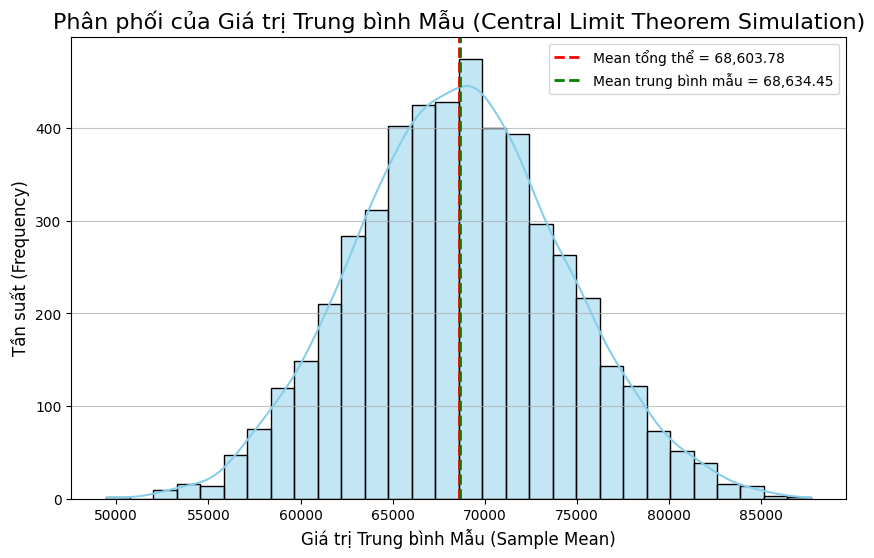

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
### mô phỏng định lý giới hạn trung tâm (Central Limit Theorem - CLT)
# Lay radom 30 mau --> tinh trung binh luong cua 20 mau --> luu vao danh sach mean_samples
# Lap lai 5000 lan --> ve bieu do histogram

size = 30                # cỡ mẫu mỗi lần lấy
num_samples = 5000         # số lần lặp (số mẫu)
mean_samples = []        # danh sách lưu giá trị trung bình của từng mẫu
for i in range(num_samples):
    clt_df = df.sample(n=size)
    mean_clt = clt_df['Salary'].mean()
    mean_samples.append(mean_clt)


# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(mean_samples, kde=True, color='skyblue', bins=30)

# Thêm đường trung bình tổng thể
population_mean  = df['Salary'].mean()
plt.axvline(population_mean, color='red', linestyle='--', linewidth=2,
            label=f'Mean tổng thể = {population_mean:,.2f}')

# Trung bình của các trung bình mẫu
sample_means_mean = np.mean(mean_samples)

# Đường trung bình của các trung bình mẫu
plt.axvline(sample_means_mean, color='green', linestyle='--', linewidth=2,
            label=f'Mean trung bình mẫu = {sample_means_mean:,.2f}')
# Trang trí biểu đồ
plt.title('Phân phối của Giá trị Trung bình Mẫu (Central Limit Theorem Simulation)', fontsize=16)
plt.xlabel('Giá trị Trung bình Mẫu (Sample Mean)', fontsize=12)
plt.ylabel('Tần suất (Frequency)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()